In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from collections import Counter
import nltk
from nltk.corpus import stopwords
#importing cont vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from spacy.lang.en.stop_words import STOP_WORDS
import string

In [10]:
def preprocess_message(msg):
    msg = msg.lower().translate(str.maketrans('', '', string.punctuation))
    msg = msg.replace('\n', ' ')
    return msg

def load_jsonl(path):
    data_list = []
    with open(path, 'r') as file:
        for line in file:
            dialog = json.loads(line)
            for idx in range(len(dialog["messages"])):
                sender_label = dialog["sender_labels"][idx]
                receiver_label = dialog["receiver_labels"][idx]
                message = preprocess_message(dialog["messages"][idx])

                if sender_label is None:
                    continue

                label = 1 if sender_label else 0

                data_list.append({
                    "message": message,
                    "sender_label": label,
                    "receiver_label": None if receiver_label == "NOANNOTATION" else receiver_label,
                    "score_delta": int(dialog["game_score_delta"][idx]),
                    "speaker": dialog["speakers"][idx],
                    "receiver": dialog["receivers"][idx],
                    "game_id": dialog["game_id"],
                    "message_position": idx,
                    "season": dialog["seasons"][idx],
                    "year": int(dialog["years"][idx])
                })

    return pd.DataFrame(data_list)


train_df = load_jsonl("train.jsonl")


train_df.to_csv("train_2.csv", index=False)

Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13132 entries, 0 to 13131
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   message           13119 non-null  object
 1   sender_label      13132 non-null  int64 
 2   receiver_label    12025 non-null  object
 3   score_delta       13132 non-null  int64 
 4   speaker           13132 non-null  object
 5   receiver          13132 non-null  object
 6   game_id           13132 non-null  int64 
 7   message_position  13132 non-null  int64 
 8   season            13132 non-null  object
 9   year              13132 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 1.0+ MB
None

Class Distribution:

sender_label
1    0.954995
0    0.045005
Name: proportion, dtype: float64


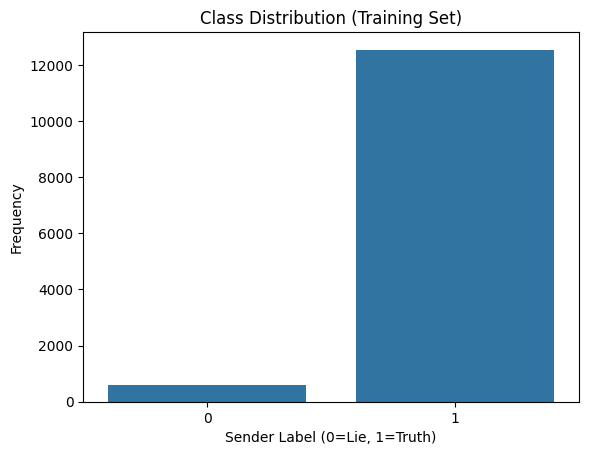

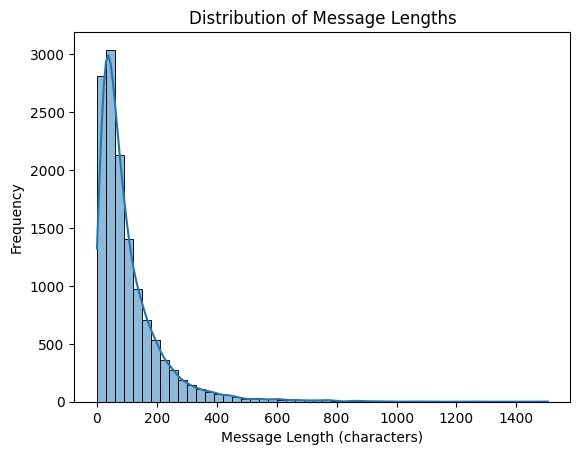

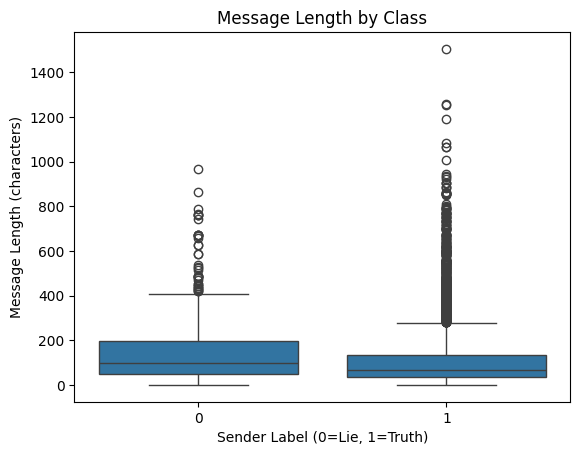


Most common words in truthful messages:
 [('im', 1328), ('france', 1284), ('think', 1284), ('italy', 1181), ('russia', 1109), ('england', 1081), ('support', 1079), ('like', 1075), ('going', 971), ('austria', 945), ('i’m', 931), ('germany', 925), ('want', 806), ('good', 750), ('turkey', 739), ('know', 650), ('yeah', 630), ('sure', 582), ('need', 568), ('fleet', 560)]

Most common words in deceptive messages:
 [('think', 119), ('like', 103), ('going', 100), ('support', 93), ('russia', 89), ('england', 86), ('want', 76), ('i’m', 75), ('germany', 72), ('im', 72), ('france', 71), ('don’t', 56), ('good', 55), ('turn', 53), ('turkey', 53), ('game', 52), ('sure', 51), ('know', 50), ('work', 46), ('italy', 45)]


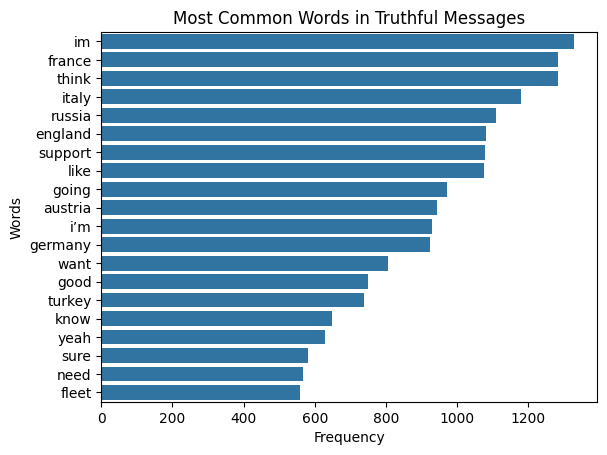

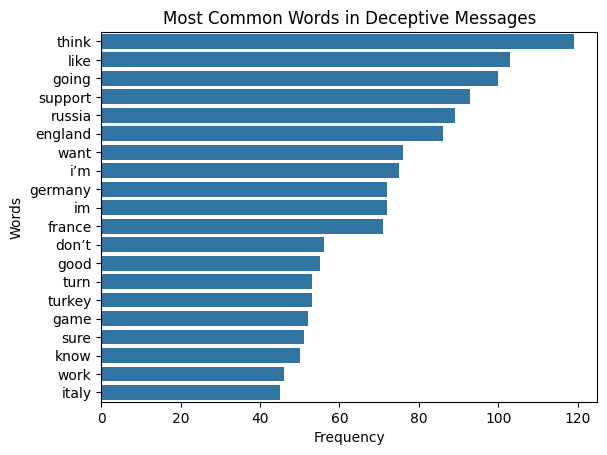

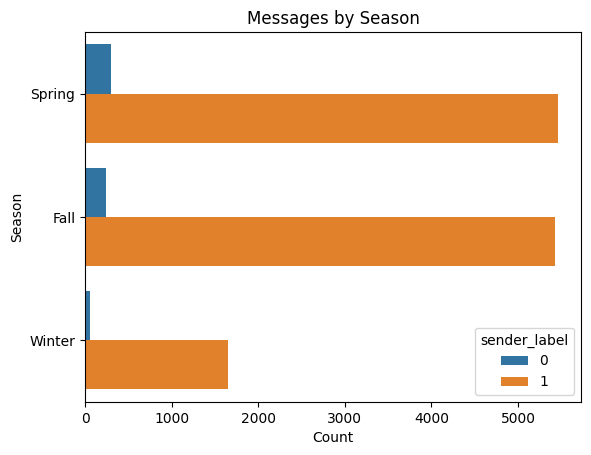

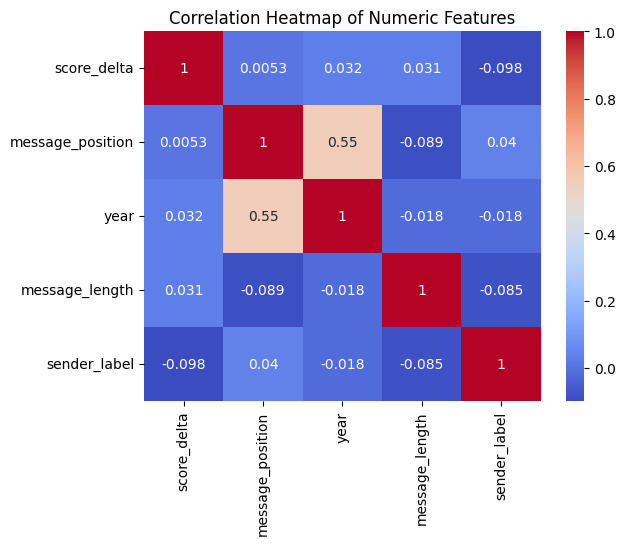

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
from spacy.lang.en import English
from collections import Counter

def load_dataset(file_path):
   
    return pd.read_csv(file_path)

def display_dataset_info(dataset):
 
    print("Dataset Overview:\n")
    print(dataset.info())

def plot_class_distribution(dataset):
    
    print("\nClass Distribution:\n")
    print(dataset['sender_label'].value_counts(normalize=True))
    sns.countplot(x='sender_label', data=dataset)
    plt.title('Class Distribution (Training Set)')
    plt.xlabel('Sender Label (0=Lie, 1=Truth)')
    plt.ylabel('Frequency')
    plt.show()

def analyze_message_lengths(dataset):
   
    dataset['message'] = dataset['message'].fillna('')  
    dataset['message_length'] = dataset['message'].apply(len)
    sns.histplot(dataset['message_length'], bins=50, kde=True)
    plt.title('Distribution of Message Lengths')
    plt.xlabel('Message Length (characters)')
    plt.ylabel('Frequency')
    plt.show()

    sns.boxplot(x='sender_label', y='message_length', data=dataset)
    plt.title('Message Length by Class')
    plt.xlabel('Sender Label (0=Lie, 1=Truth)')
    plt.ylabel('Message Length (characters)')
    plt.show()

def find_common_words(text_series, stop_words, top_n=20):
   
    all_words = ' '.join(text_series).split()
    filtered_words = [word for word in all_words if word not in stop_words]
    most_common = Counter(filtered_words).most_common(top_n)
    return most_common

def plot_common_words(common_words_list, title):
   
    words, counts = zip(*common_words_list)
    sns.barplot(y=list(words), x=list(counts))
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

def analyze_messages_by_season(dataset):

    sns.countplot(y='season', hue='sender_label', data=dataset)
    plt.title('Messages by Season')
    plt.xlabel('Count')
    plt.ylabel('Season')
    plt.show()

def plot_correlation_heatmap(dataset, numeric_columns):
  
    sns.heatmap(dataset[numeric_columns].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()


dataset = load_dataset("train.csv")
display_dataset_info(dataset)
plot_class_distribution(dataset)
analyze_message_lengths(dataset)

# Using spaCy stop words
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Common words in truthful messages
truthful_words = find_common_words(dataset[dataset['sender_label'] == 1]['message'], stop_words)
print("\nMost common words in truthful messages:\n", truthful_words)

# Common words in deceptive messages
deceptive_words = find_common_words(dataset[dataset['sender_label'] == 0]['message'], stop_words)
print("\nMost common words in deceptive messages:\n", deceptive_words)

# Plotting common words for truthful vs deceptive messages
plot_common_words(truthful_words, 'Most Common Words in Truthful Messages')
plot_common_words(deceptive_words, 'Most Common Words in Deceptive Messages')

analyze_messages_by_season(dataset)

# Correlation heatmap for numeric features
numeric_columns = ['score_delta', 'message_position', 'year', 'message_length', 'sender_label']
plot_correlation_heatmap(dataset, numeric_columns)

[<class 'str'> <class 'float'>]
[<class 'int'>]
[<class 'bool'> <class 'float'>]


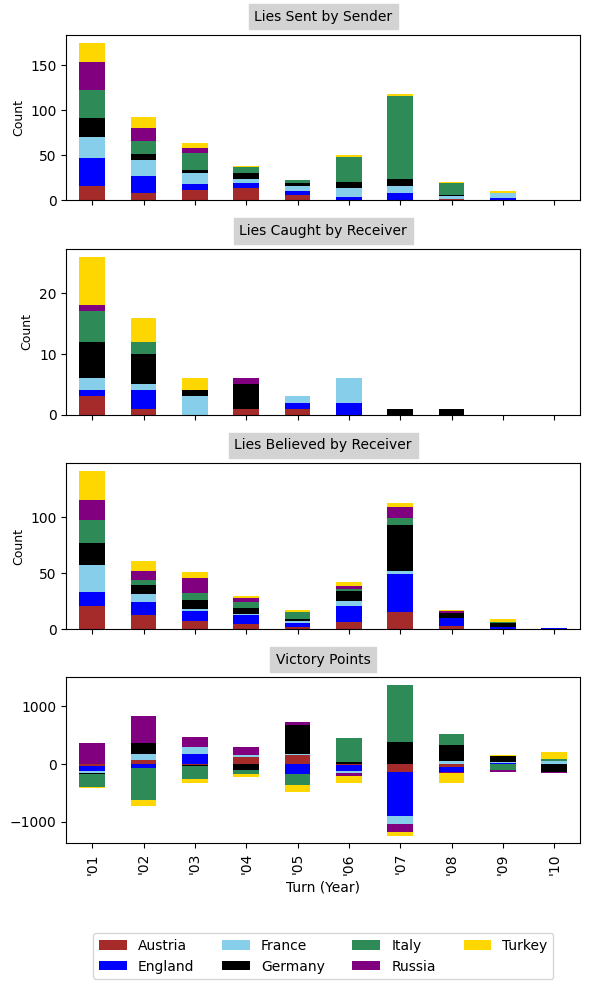

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_dataset(file_path):
    """Loading the dataset from a CSV file"""
    return pd.read_csv(file_path)

def check_data_types(dataset):
    """Checking the data types of specific columns"""
    print(dataset['message'].apply(type).unique())
    print(dataset['sender_label'].apply(type).unique())
    print(dataset['receiver_label'].apply(type).unique())

def create_turn_label(dataset):
    """Creating a 'turn' label for plotting"""
    dataset['turn'] = "'" + dataset['year'].astype(str).str[-2:]
    return dataset

def group_data_by_category(dataset):
    """Grouping data for each subplot"""
    lies_sent = (
        dataset[dataset['sender_label'] == 0]
        .groupby(['turn', 'speaker'])
        .size()
        .unstack(fill_value=0)
    )

    caught_lies = (
        dataset[(dataset['sender_label'] == 0) & (dataset['receiver_label'] == False)]
        .groupby(['turn', 'receiver'])
        .size()
        .unstack(fill_value=0)
    )

    believed_lies = (
        dataset[(dataset['sender_label'] == 0) & (dataset['receiver_label'] == True)]
        .groupby(['turn', 'receiver'])
        .size()
        .unstack(fill_value=0)
    )

    victory_points = (
        dataset.groupby(['turn', 'speaker'])['score_delta']
        .sum()
        .unstack(fill_value=0)
    )

    return lies_sent, caught_lies, believed_lies, victory_points

def plot_subplots(lies_sent, caught_lies, believed_lies, victory_points):
    """Plotting each subplot"""
    country_labels = {
        'austria': 'Austria',
        'england': 'England',
        'france': 'France',
        'germany': 'Germany',
        'italy': 'Italy',
        'russia': 'Russia',
        'turkey': 'Turkey'
    }
    color_scheme = {
        'austria': '#a52a2a',
        'england': '#0000ff',
        'france': '#87ceeb',
        'germany': '#000000',
        'italy': '#2e8b57',
        'russia': '#800080',
        'turkey': '#ffd700'
    }
    country_order = list(country_labels.keys())

    fig, axes = plt.subplots(4, 1, figsize=(6, 10), sharex=True)
    titles = [
        'Lies Sent by Sender',
        'Lies Caught by Receiver',
        'Lies Believed by Receiver',
        'Victory Points'
    ]
    plot_data = [lies_sent, caught_lies, believed_lies, victory_points]

    for ax, data, title in zip(axes, plot_data, titles):
        data = data.reindex(columns=country_order, fill_value=0)
        display_labels = [country_labels.get(c, c) for c in data.columns]
        bar_colors = [color_scheme.get(c, '#cccccc') for c in data.columns]
        data.columns = display_labels

        data.plot(
            kind='bar', stacked=True, ax=ax,
            color=bar_colors, legend=False
        )
        ax.set_title(title, fontsize=10, backgroundcolor='lightgrey', pad=10)
        ax.set_ylabel('Count' if title != 'Victory Points' else '', fontsize=9)
        ax.set_xlabel('')

    axes[-1].set_xlabel("Turn (Year)")
    axes[-1].legend(
        display_labels,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.5),
        ncol=4
    )

    plt.tight_layout()
    plt.show()

def main(file_path):
    """Main function to load data, process it, and plot the results"""
    dataset = load_dataset(file_path)
    check_data_types(dataset)
    dataset = create_turn_label(dataset)
    lies_sent, caught_lies, believed_lies, victory_points = group_data_by_category(dataset)
    plot_subplots(lies_sent, caught_lies, believed_lies, victory_points)

# Main execution
if __name__ == "__main__":
    file_path = "train.csv"
    main(file_path)

In [24]:
import json

def load_jsonl(file_path):
    with open(file_path, 'r', encoding="utf-8") as file:
        return [json.loads(line) for line in file]

def count_messages(data_list):
    total_messages = 0
    total_actual_lies = 0
    total_suspected_lies = 0
    total_words = 0

    for data in data_list:
        messages = data["messages"]
        sender_labels = data["sender_labels"]
        receiver_labels = data["receiver_labels"]

        total_messages += len(messages)

        total_actual_lies += sum(1 for label in sender_labels if label is False)

        total_suspected_lies += sum(1 for label in receiver_labels if label is False)

        total_words += sum(len(msg.split()) for msg in messages)

    return total_messages, total_actual_lies, total_suspected_lies, total_words

def compute_averages(total_messages, total_words):
    return total_words / total_messages if total_messages > 0 else 0


data_list = load_jsonl("train.jsonl")
total_messages, total_actual_lies, total_suspected_lies, total_words = count_messages(data_list)
average_words_per_message = compute_averages(total_messages, total_words)

print(f"Total Messages: {total_messages:,}")
print(f"Total ACTUAL Lies: {total_actual_lies}")
print(f"Total SUSPECTED Lies: {total_suspected_lies}")
print(f"Average Words per Message: {average_words_per_message:.2f}")


Total Messages: 13,132
Total ACTUAL Lies: 591
Total SUSPECTED Lies: 566
Average Words per Message: 20.79


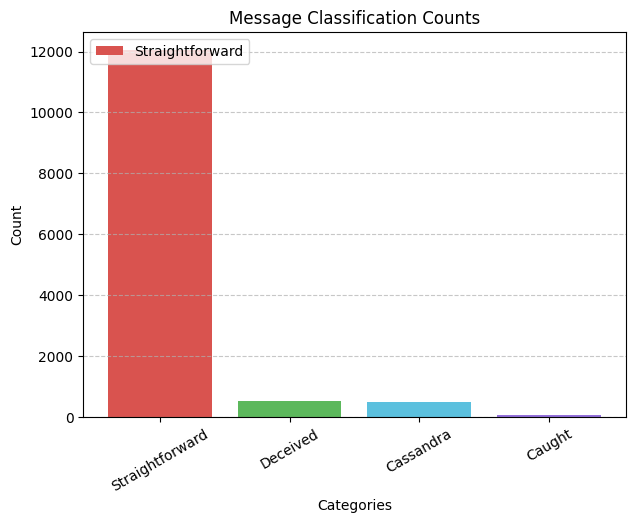

In [23]:
import matplotlib.pyplot as plt

def initialize_category_counts():
    """
    Initialize the counts for each message category.
    """
    return {
        "Straightforward": 0,
        "Deceived": 0,
        "Cassandra": 0,
        "Caught": 0
    }

def process_game_data(data_list):
    """
    Process each game dataset to count the occurrences of each message category.
    """
    category_counts = initialize_category_counts()
    
    for game_data in data_list:
        sender_truthfulness = game_data["sender_labels"]  # True = truthful, False = lie
        receiver_perception = game_data["receiver_labels"]  # True = suspected lie, False = believed

        for sender, receiver in zip(sender_truthfulness, receiver_perception):
            if sender and receiver:
                category_counts["Straightforward"] += 1
            elif not sender and receiver:
                category_counts["Deceived"] += 1
            elif sender and not receiver:
                category_counts["Cassandra"] += 1
            elif not sender and not receiver:
                category_counts["Caught"] += 1
    
    return category_counts

def plot_category_counts(category_counts):
    """
    Plot the counts of each message category.
    """
    category_names = list(category_counts.keys())
    category_values = list(category_counts.values())
    bar_colors = ["#D9534F", "#5CB85C", "#5BC0DE", "#9370DB"]  # Red, Green, Blue, Purple

    plt.figure(figsize=(7, 5))
    plt.bar(category_names, category_values, color=bar_colors)

    # Adding labels
    plt.xlabel("Categories")
    plt.ylabel("Count")
    plt.title("Message Classification Counts")

    # Customizing y-axis scale
    plt.xticks(rotation=30)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Adding legend
    plt.legend(["Straightforward", "Deceived", "Cassandra", "Caught"], loc="upper left")

    plt.show()

# Main execution

category_counts = process_game_data(data_list)
plot_category_counts(category_counts)